# Engenharia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-whitegrid')

import seaborn as sns
import numpy as np
import sklearn

In [6]:
datafram = pd.read_csv("train.csv")

In [7]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
# valor nulo

dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Titanic (Grupo 2)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

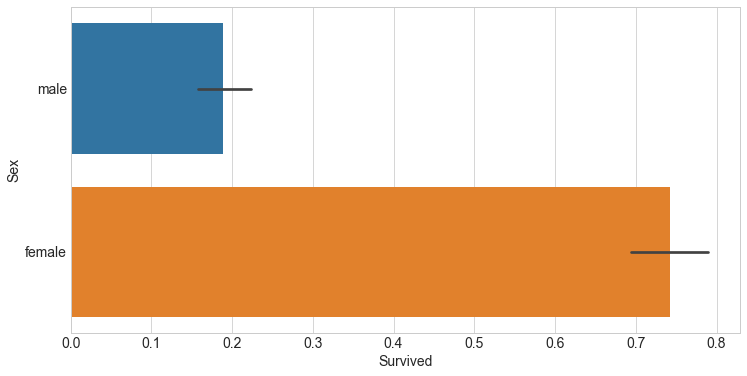

In [42]:
sns.barplot(x= 'Survived', y= 'Sex', data=dataframe)


De acordo com o resumo proposto pelo gráfico acima, é visível que há uma discrepância entre o sexo dos sobreviventes. Sendo, que os sobreviventes do sexo feminino são muito mais frequêntes quando comparados aos sobreviventes do sexo masculino, o que nos leva a análise via coeficiente de variação (para comparar as médias), correlação para entendermos o comportamento da dispersão da relação entre sobreviventes e não sobreviventes. 

In [13]:
dataframe["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [83]:
dataframe[~dataframe['Embarked'].isin(['S', 'C', 'Q'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [24]:

# filt_df = dataframe[dataframe["Sex"] == "female"] # Filtrando apenas dados females
# NaN = np.nan
# CV = ((filt_df["Survived"].std()/filt_df["Survived"].mean()))*100
# EixoX = [CV]


CV_female = dataframe.query("Sex == 'female'").std()/dataframe.query("Sex == 'female'").mean()*100
CV_male = dataframe.query("Sex == 'male'").std()/dataframe.query("Sex == 'male'").mean()*100

display(CV_female)
display(CV_male)

C:\Users\Admin\AppData\Local\Temp/ipykernel_3660/2254381183.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CV_female = dataframe.query("Sex == 'female'").std()/dataframe.query("Sex == 'female'").mean()*100
C:\Users\Admin\AppData\Local\Temp/ipykernel_3660/2254381183.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CV_male = dataframe.query("Sex == 'male'").std()/dataframe.query("Sex == 'male'").mean()*100


PassengerId     59.589152
Survived        59.055072
Pclass          39.703408
Age             50.545542
SibSp          166.581347
Parch          157.438062
Fare           130.391041
dtype: float64

PassengerId     56.696612
Survived       207.389298
Pclass          34.041751
Age             47.770269
SibSp          247.042382
Parch          259.774656
Fare           169.011294
dtype: float64

In [ ]:
male = 0,0,0,0,1
female = 1,0,1,1,0

In [20]:
import numpy as np
import numpy
filt_dfma = dataframe[dataframe["Sex"] == "male"] # Filtrando apenas dados males
CVMA = ((filt_dfma["Survived"].std()/filt_dfma["Survived"].mean()))*100
EixoX.append(CVMA)
EixoY = ["CV Female", "CV Male"]
print(CVMA)

NameError: name 'EixoX' is not defined

In [34]:
dataframe.groupby("Survived").Sex.value_counts(normalize=True)
# dataframe.groupby("Survived").max()

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: Sex, dtype: float64

In [43]:
# sns.barplot(x = EixoX, y = EixoY)

NameError: name 'EixoX' is not defined

Agora, interpretanto o data frame a partir da dispersão dos dados entorno da média pode-se concluir que há uma maior dispersão entorno da média entre as sobreviventes do sexo masculino, em detrimento do sexo feminino que tem uma alta dispersão em torno da média. O contexto dos dados é altamente atípico, portanto ainda não se sabe qual distribuição esse data_set. Para tal, partimos para análise entre as idades dos sobreviventes.

In [38]:
dataframe.groupby("Survived")['Age'].mean()
# dataframe.groupby("Survived").max()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

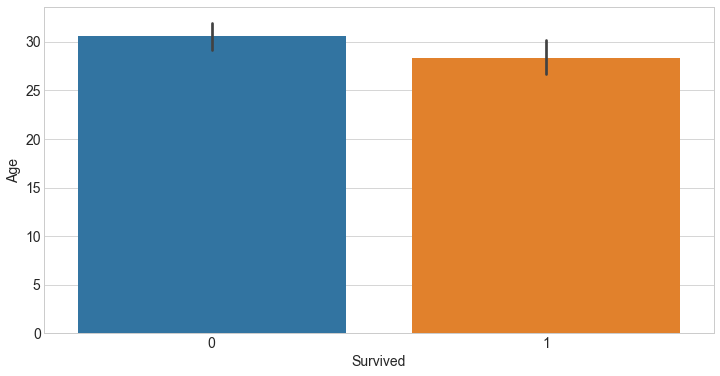

In [44]:

sns.barplot(x = 'Survived', y = 'Age', data=dataframe)

Como consta visualmente, não há uma discrepância significativa entre os sobreviventes e os não sobreviventes. Todavia, a não significância pode estar atrelada ao status social dos tripulantes do navio naquela determinada época, para tal uma correlação entre a distribuição de renda naquele tempo e a idade poderia trazer alguma informação. Agora, partindo para uma visão macro...

Sobrevivencia com base na idade e classe social

<AxesSubplot:xlabel='Survived', ylabel='Age'>

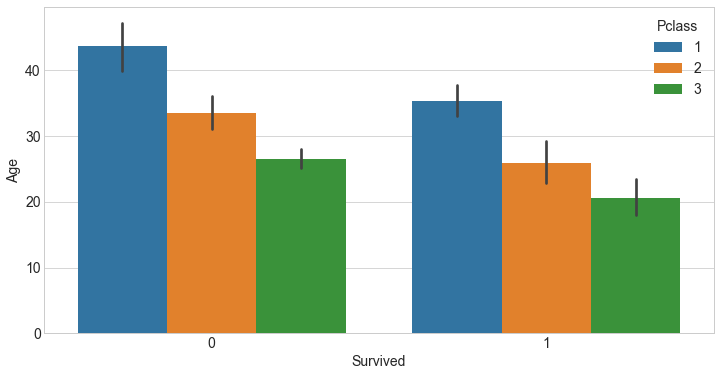

In [45]:
sns.barplot(x = 'Survived', y = 'Age', hue='Pclass', data=dataframe)

Text(0, 0.5, 'Contagem')

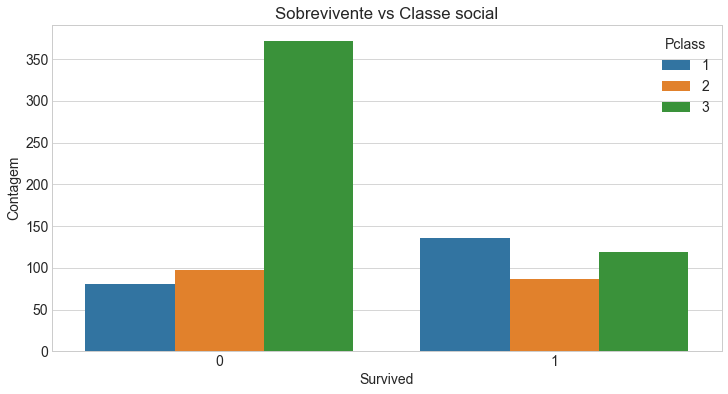

In [54]:
sns.countplot(x = 'Survived', hue='Pclass', data=dataframe)
plt.title("Sobrevivente vs Classe social")
plt.ylabel("Contagem")

Teste de hipotese

<AxesSubplot:xlabel='Pclass', ylabel='count'>

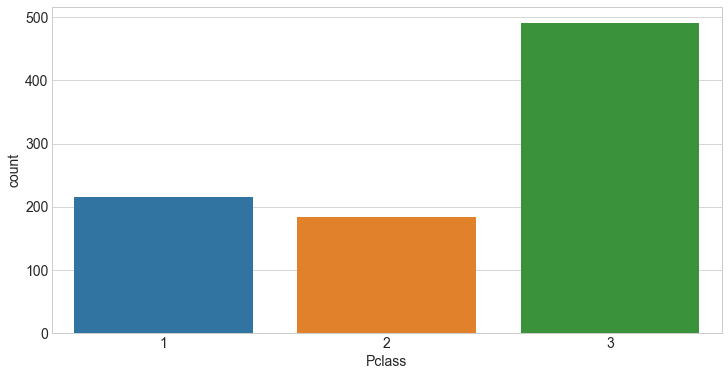

In [68]:
sns.countplot(x='Pclass', data=dataframe)

In [56]:
dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

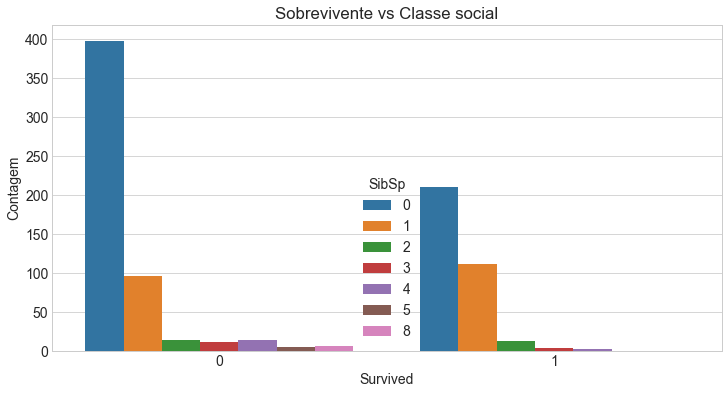

In [59]:
sns.countplot(x = 'Survived', hue='SibSp', data=dataframe)
plt.title("Sobrevivente vs Classe social")
plt.ylabel("Contagem");

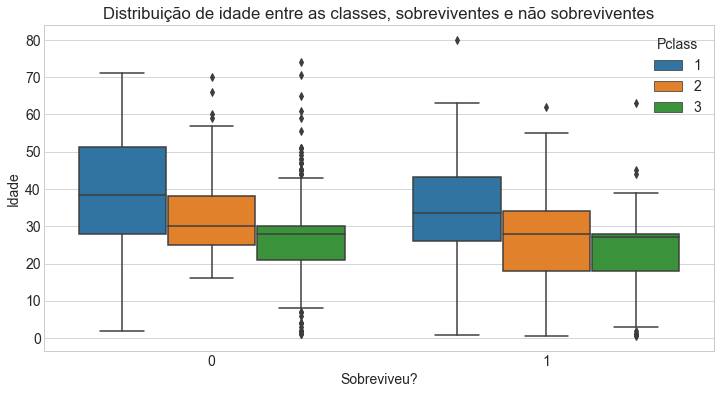

In [107]:
# boxplot survived vs age

sns.boxplot(x = 'Survived', y = 'Age', hue="Pclass", data = dataframe)
plt.title("Distribuição de idade entre as classes, sobreviventes e não sobreviventes")
plt.xlabel("Sobreviveu?")
plt.ylabel("Idade");
# sns.swarmplot(x="Survived", y="Age",hue='Pclass', data=dataframe)

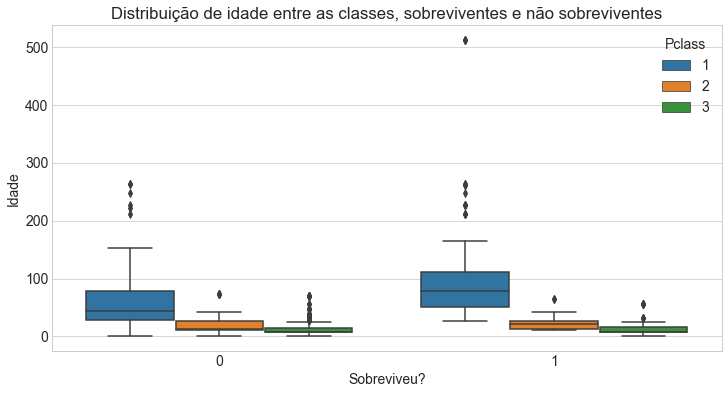

In [57]:
# boxplot survived vs fare

sns.boxplot(x = 'Survived', y = 'Fare', hue="Pclass", data = dataframe)
plt.title("Distribuição de idade entre as classes, sobreviventes e não sobreviventes")
plt.xlabel("Sobreviveu?")
plt.ylabel("Idade");

Os dados resumidos no box plot estão com média 0 e 1 exceto o índice, devido a essas variáveis serem binárias. 

<AxesSubplot:>

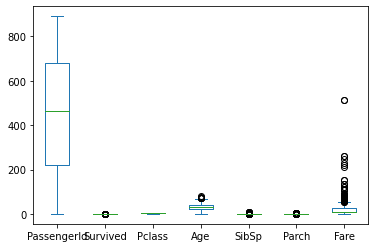

In [ ]:
filt_dfma.plot.box()

<AxesSubplot:>

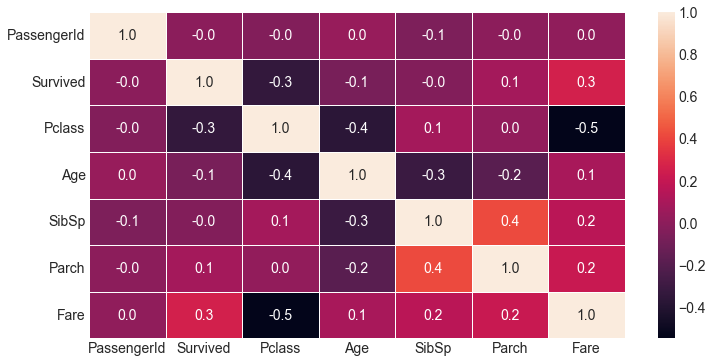

In [77]:
import seaborn as sn
correlation = dataframe.corr()
sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)


In [84]:
dataframe.groupby('Embarked')['Pclass'].mean()

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64

In [89]:
# number of people who survived in each embarked port

dataframe.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [90]:
dataframe.Embarked.fillna('C', inplace=True)

In [95]:
# null ages

idades_nulas = dataframe[dataframe.Age.isnull()]

In [97]:
idades_nulas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [102]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')

dataframe['Age'] = imp.fit_transform(dataframe[['Age']])

<AxesSubplot:ylabel='Frequency'>

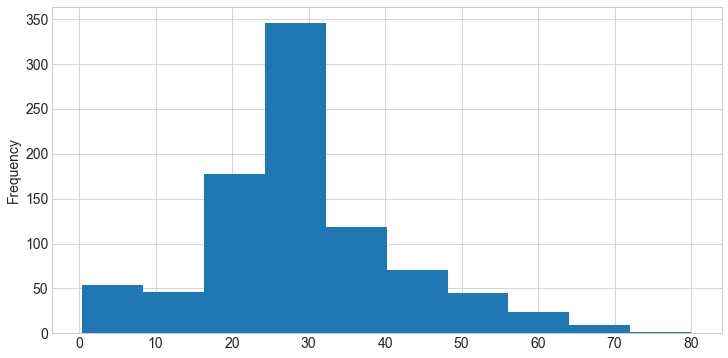

In [103]:
dataframe['Age'].plot(kind='hist')

In [104]:
# drop cabin

dataframe.drop('Cabin', axis=1, inplace=True)

In [106]:
dataframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Modelagem